In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

In [2]:
def plot_sphere(r=1, center=(0,0,0), plot_center=False, panels=False, alpha=0.3):
    """
    The plot of a sphere with radius r and center 'center'.
    r: float
        The radious of the sphere. Default 1.
    center: 3d array like
        The center of the sphere. Default (0,0,0).    
    plot_center: bool
        Set to True to plot the center of the sphere. Default False.
    panels: bool 
        Set to True to see the axis and panels containing the plot
        otherwise just plots the sphere. Default False.
    alpha: float [0-1]
        Opacity of the sphere. Default 0.3."""
    

    #Plot using spherical coordinates
    phi   = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)

    x = center[0] + r*np.outer(np.cos(phi), np.sin(theta))
    y = center[1] + r*np.outer(np.sin(phi), np.sin(theta))
    z = center[2] + r*np.outer(np.ones(np.size(phi)), np.cos(theta))

    ax = plt.axes(projection="3d")
    ax.plot_surface(x, y, z, alpha=alpha)
    if not panels: 
        ax.set_axis_off()
    else: 
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        
    if plot_center: ax.scatter(center[0], center[1], center[2])
    fig.tight_layout()

In [90]:
def generate_path(l, r, center=[0,0,0], seed=False, info=False):

    xs = [center[0]]
    ys = [center[1]]
    zs = [center[2]]
    
    a = -2
    b =  2
    if seed: np.random.seed(seed)
        
    while xs[-1]**2 + ys[-1]**2 + zs[-1]**2 <= r**2:
        xs.append( xs[-1] + (a + (b-a)*np.random.rand())*l )
        ys.append( ys[-1] + (a + (b-a)*np.random.rand())*l )
        zs.append( zs[-1] + (a + (b-a)*np.random.rand())*l )
    
    if info:
        print( f"The final radious is r_final = {np.sqrt(xs[-1]**2 + ys[-1]**2 + zs[-1]**2):.3f}" )
        print( f"Iteretions: {len(xs)}")
    
    return xs, ys, zs

In [122]:
r = 1
path = generate_path(0.01, r=r)

The final radious is r_final = 1.001
Iteretions: 1820


<IPython.core.display.Javascript object>


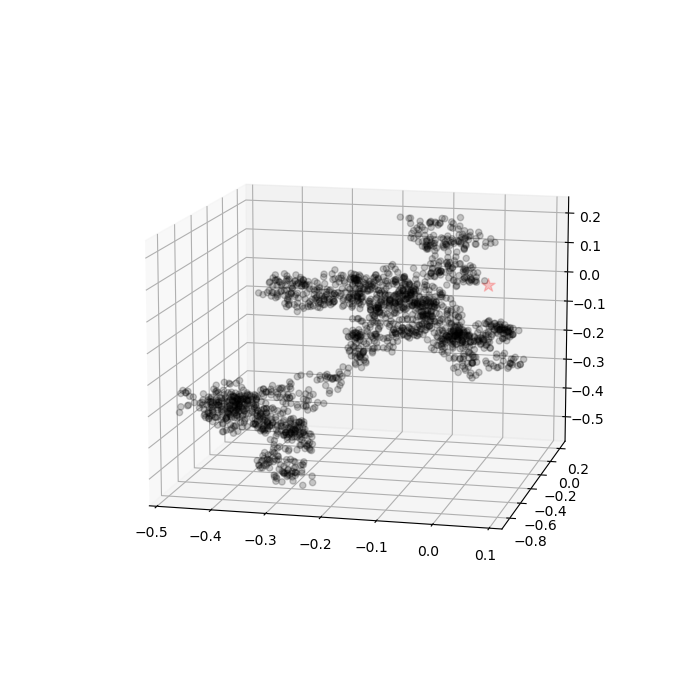

In [127]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.scatter(path[0][1:], path[1][1:], path[2][1:], alpha=0.2, color="black")
ax.scatter(path[0][0], path[1][0], path[2][0], s=100, alpha=0.2, color="red", marker="*")

In [86]:
path[0][0], path[1][0], path[2][0]

(0, 0, 0)